# Time Series Final Project

This report is based on the excel spreadsheet named "data_exam.xlsx". 

*Authors: Sarra Ben Yahia & José Ángel García Sánchez*

###### 1. Explain the concept behind each column. What are these time series meant to represent? Transform these time series so that they are comparable in scale and order. 

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_excel("./data_exam.xlsx")
date_list=df.iloc[:,0]

datesFormated=pd.to_datetime(date_list, format="%d.%m.%Y")
volatility_series=df.iloc[:,1:4]

volatility_changes = volatility_series
volatility_changes.index = datesFormated

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform each column
volatility_changes_scaled = pd.DataFrame(scaler.fit_transform(volatility_changes), columns=volatility_changes.columns)

# set the index of the scaled dataframe to match the original
volatility_changes_scaled.index = volatility_changes.index

# print the first five rows of the scaled dataframe
print(volatility_changes_scaled.head())

                 VIX  Parkinson  Squared returns
Unnamed: 0                                      
2000-01-04  0.786088   2.174156         1.363266
2000-01-05  0.716917  -0.268696         0.527071
2000-01-06  0.638524  -0.192807         0.067398
2000-01-07  0.176234   2.470927         1.689898
2000-01-10  0.175081  -0.081549        -0.101029


### **Description of the columns**

----

**Column B:**   
The VIX is a measure of market volatility often referred to as the "fear index." The VIX level represents the level of expected volatility in the S&P 500 index over the next 30 days. The VIX level is calculated based on the prices of options contracts on the S&P 500 index.

A higher VIX level indicates greater expected volatility, while a lower VIX level suggests a lower level of expected volatility. Generally, when the stock market experiences significant price fluctuations, the VIX level tends to increase, as investors become more uncertain and demand higher premiums for options contracts to hedge their positions. Conversely, when the market is relatively stable, the VIX level tends to be lower.

----

**Column C:**
The parkison estimates refers to the parkinson law formula (1980) used to estimate the volatility of stock prices.

Parkinson's law calculates the daily volatility of a stock by using the high and low prices of the day. The formula is as follows:

Parkinson's volatility estimate = (High price - Low price) / sqrt(2 * closing price)

Where:

- High price: the highest price of the stock during the day
- Low price: the lowest price of the stock during the day
- Closing price: the closing price of the stock for the day

The result of the formula represents the estimated standard deviation of the stock's daily returns. Parkinson's law is considered one of the simplest ways to estimate volatility, although it has some limitations and may not always accurately reflect the true volatility of a stock.

----

**Columns D:**
Squared returns are a measure of the volatility of an asset, such as a stock or a portfolio of stocks. They are obtained by squaring the daily returns of the asset.  

Daily returns are the percentage change in the price of an asset from one day to the next. Squaring the daily returns helps to emphasize large changes in the asset's price, as large returns are amplified when they are squared. The resulting squared returns can be summed over a period of time to give an estimate of the asset's volatility over that period.  

Squared returns are often used in financial modeling and risk management to estimate the volatility of an asset or portfolio of assets, which is an important measure of risk. Higher volatility means greater uncertainty and potential for larger price swings, while lower volatility suggests a more stable asset with smaller price fluctuations.  


---

###### Q2

/Users/pepegarcia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

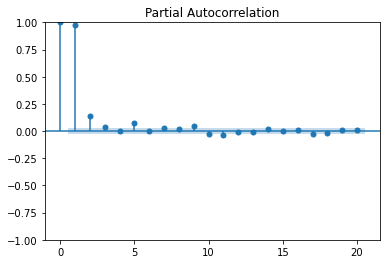

In [31]:
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_pacf


# loop over each column in the dataframe
for col in volatility_changes_scaled.columns:
    # extract the time series and convert to a numpy array
    ts = volatility_changes_scaled[col].values
    # determine the order of the AR process using the PACF plot
    plot_pacf(ts, lags=20)
    # estimate the AR model with the determined order
    ar_order = int(input(f"Enter the AR order for {col}: "))
    model = AR(ts)
    results = model.fit(ar_order)
    # print the estimated coefficients
    print(f"\nEstimates for {col} (AR{ar_order}):")
    print(results.params)